In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
pingwiny = pd.read_csv('penguins_size.csv')
png = pd.DataFrame(pingwiny.dropna())
png

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


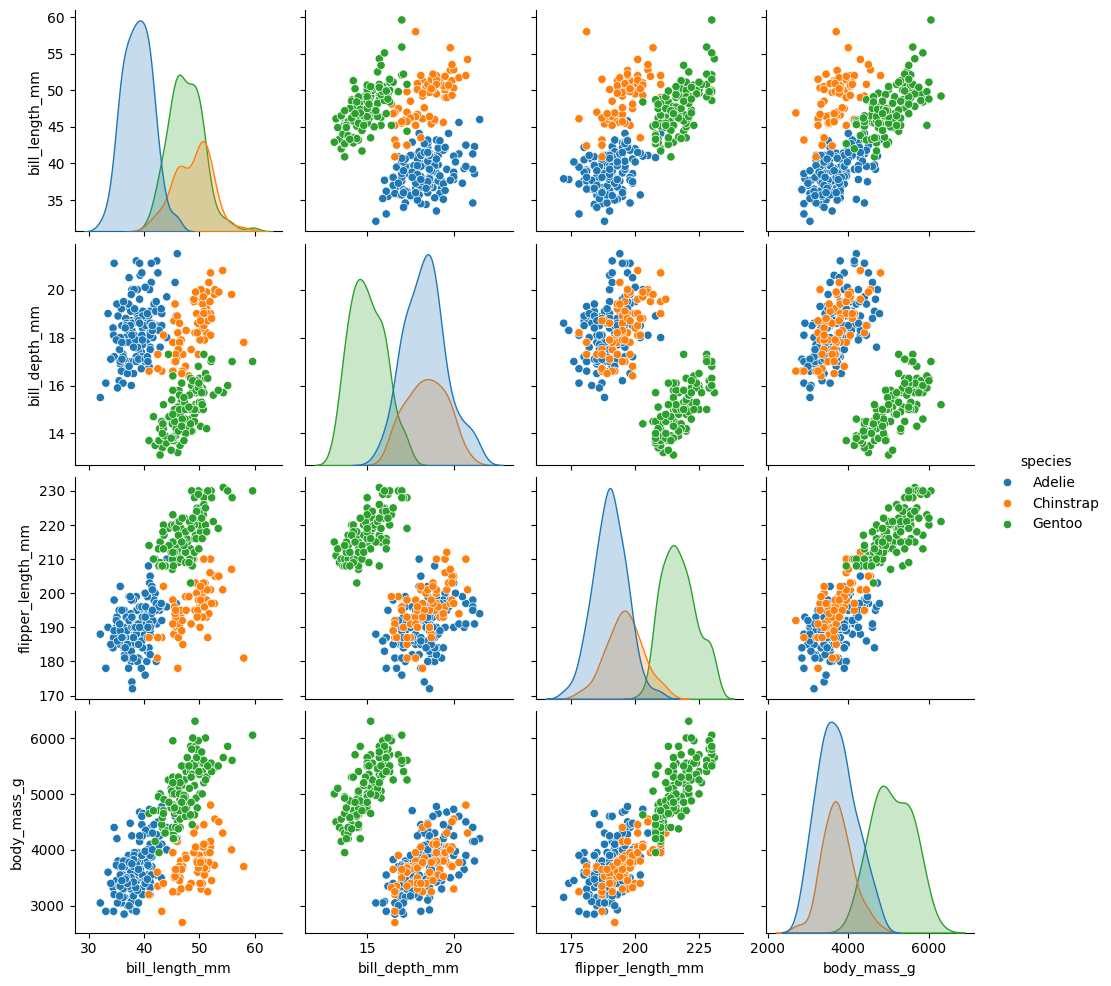

In [3]:
sns.pairplot(png, hue="species")

In [4]:
separowalne = png[png['species'].isin(['Adelie', 'Gentoo'])]
separowalne = separowalne[['flipper_length_mm', 'bill_depth_mm']]
nieseparowalne = png[png['species'].isin(['Adelie', 'Gentoo'])]
nieseparowalne = nieseparowalne[['bill_length_mm', 'body_mass_g']]

In [5]:
# Define features and target
Xs = separowalne[['flipper_length_mm', 'bill_depth_mm']]
Ys = png[png['species'].isin(['Adelie', 'Gentoo'])]['species']
scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)
# Split the data into training and testing sets
Xts, Xvs, Yts, Yvs = train_test_split(Xs, Ys, test_size=0.2, random_state=42)

# Create a pipeline with standard scaler and SVC
model_sep = SVC(kernel='linear')

# Train the model
model_sep.fit(Xts, Yts)

# Print the accuracy of the model
accuracy = model_sep.score(Xvs, Yvs)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 1.00


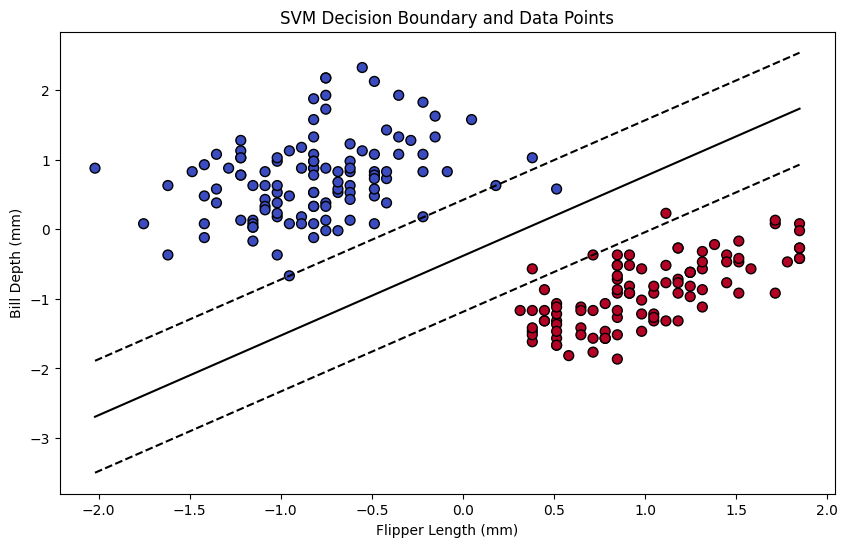

In [6]:
# Calculate the decision boundary
w = model_sep.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(Xts[:, 0]), max(Xts[:, 0]))
yy = a * xx - (model_sep.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Plot the data points
plt.scatter(Xts[:, 0], Xts[:, 1], c=Yts.map({'Adelie': 0, 'Gentoo': 1}), cmap='coolwarm', s=50, edgecolors='k')

# Set plot labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('SVM Decision Boundary and Data Points')
plt.show()

In [21]:
 
Xn = nieseparowalne[['bill_length_mm', 'body_mass_g']]
Y_nonlinear = png[png['species'].isin(['Adelie', 'Gentoo'])]['species']
Yn = Y_nonlinear.map({'Adelie': 0, 'Gentoo': 1})
scaler = StandardScaler()
Xn = scaler.fit_transform(Xn)
# Split the data into training and testing sets
Xtn, Xvn, Ytn, Yvn = train_test_split(Xn, Yn, test_size=0.2, random_state=42)

# Create a pipeline with standard scaler and SVC
model_niesep_lin = SVC(kernel='linear')
model_niesep_poly = SVC(kernel='poly')
model_niesep_rbf = SVC(kernel='rbf')
# Train the model
model_niesep_lin.fit(Xtn, Ytn)
model_niesep_poly.fit(Xtn, Ytn)
model_niesep_rbf.fit(Xtn, Ytn)

# Print the accuracy of the model
accuracy_lin = model_niesep_lin.score(Xvn, Yvn)
accuracy_poly = model_niesep_poly.score(Xvn, Yvn)
accuracy_rbf = model_niesep_rbf.score(Xvn, Yvn)

print(f"Linear model accuracy: {accuracy_lin:.2f}, \nPolynomial model accuracy: {accuracy_poly:.2f},\nRBF model accuracy: {accuracy_rbf:.2f}")

Linear model accuracy: 0.94, 
Polynomial model accuracy: 0.92,
RBF model accuracy: 0.96


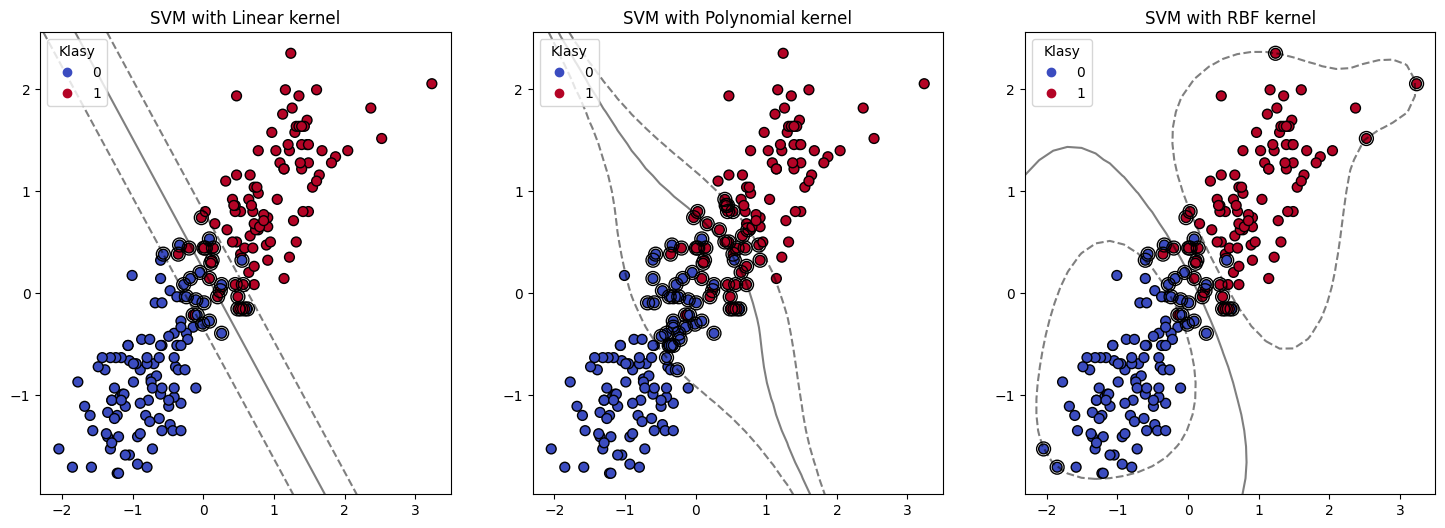

In [27]:
# Plot decision boundaries for linear, polynomial, and RBF models
plt.figure(figsize=(18, 6))

# Linear Kernel
plt.subplot(1, 3, 1)
scatter = plt.scatter(Xtn[:, 0], Xtn[:, 1], c=Ytn, cmap='coolwarm', s=50, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Klasy")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
X1, X2 = np.meshgrid(x, y)
Z = model_niesep_lin.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(X1, X2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model_niesep_lin.support_vectors_[:, 0], model_niesep_lin.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("SVM with Linear kernel")

# Polynomial Kernel
plt.subplot(1, 3, 2)
scatter = plt.scatter(Xtn[:, 0], Xtn[:, 1], c=Ytn, cmap='coolwarm', s=50, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Klasy")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
X1, X2 = np.meshgrid(x, y)
Z = model_niesep_poly.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(X1, X2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model_niesep_poly.support_vectors_[:, 0], model_niesep_poly.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("SVM with Polynomial kernel")

# RBF Kernel
plt.subplot(1, 3, 3)
scatter = plt.scatter(Xtn[:, 0], Xtn[:, 1], c=Ytn, cmap='coolwarm', s=50, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Klasy")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
X1, X2 = np.meshgrid(x, y)
Z = model_niesep_rbf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(X1, X2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model_niesep_rbf.support_vectors_[:, 0], model_niesep_rbf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("SVM with RBF kernel")

plt.show()

Wszystkie trzy użyte metody uzyskały wysoki wynik dokładności, jednak najlepiej poradził sobie RBF model uzyskując accuracy na poziomie 0.96. Tak powinniśmy podejrzewać, że się zadzieje ponieważ nasze dane nie były liniowo podzielne. Ciekawym jest, że mimo wszystko liniowa metoda jądra uzyskała delikatnie lepszy wynik niż wielomianowa.